In [1]:
import os
import glob
import pandas as pd
import numpy as np

In [2]:
files_path = './demo'
read_files = glob.glob(os.path.join(files_path, '*.txt'))

In [3]:
np_data = []
for f in read_files:
    data = pd.read_csv(f, sep=',', header=0)
    np_data.append(data)

In [4]:
merge_data = np.vstack(np_data)
X = pd.DataFrame(merge_data)

In [5]:
X.head(10)

,0,1,2
0,292100,1146175,1
1,174945,237215,1
2,174945,6607175,1
3,174945,6081367,17
4,174943,27536,1
5,2524125,2257425,9
6,3619500,2257425,9
7,4733925,2343150,9
8,3619500,3705225,9
9,3619500,4924425,9


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58281 entries, 0 to 58280
Data columns (total 3 columns):
0    58281 non-null object
1    58281 non-null object
2    58281 non-null object
dtypes: object(3)
memory usage: 1.3+ MB


In [7]:
%%time
X[0] = X[0].astype('int')
X[1] = X[1].astype('int')
X[2] = pd.to_numeric(X[2], errors='coerce')

X = X.dropna()

CPU times: user 43.7 ms, sys: 3.8 ms, total: 47.5 ms
Wall time: 59.4 ms


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57469 entries, 0 to 58280
Data columns (total 3 columns):
0    57469 non-null int64
1    57469 non-null int64
2    57469 non-null float64
dtypes: float64(1), int64(2)
memory usage: 1.8 MB


In [9]:
X.shape

(57469, 3)

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

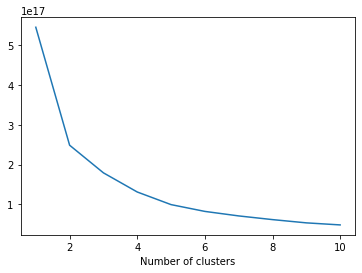

In [11]:
res = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    res.append(kmeans.inertia_)

plt.plot(range(1, 11), res)
plt.title('')
plt.xlabel('Number of clusters')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred = kmeans.fit_predict(X)

# calculate the accuracy
accuracy = round((np.mean(pred)) * 100)
print('Accuracy:' + str(accuracy))

Accuracy:45.0


<ipython-input-13-05a9fae0b2d2>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


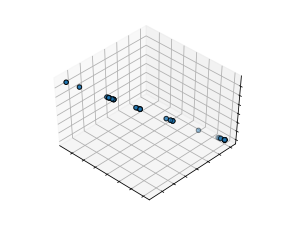

In [13]:
fignum = 1
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax.scatter(X[:20], X[:20], X[:20], edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.dist = 12

fig.show()